In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# re-install tira from github, for faster prototyping
# !pip3 uninstall -y tira
# !pip3 install git+https://github.com/gijshendriksen/tira.git@development#\&subdirectory=python-client

In [3]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import pyterrier as pt
import seaborn as sns

from tira.third_party_integrations import ensure_pyterrier_is_loaded
from tira.rest_api_client import Client

from feature_extraction import all_features

ensure_pyterrier_is_loaded()
tira = Client()

PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


In [4]:
dataset = pt.get_dataset('irds:ir-benchmarks/longeval-2023-01-20240423-training')

In [5]:
feature_extraction = all_features(tira, dataset)

UnboundLocalError: local variable 'resp' referenced before assignment

In [ ]:
with open('models/lmart_all.pkl', 'rb') as f:
    lmart = pickle.load(f)

In [ ]:
df = pd.DataFrame({
    'feature_name': feature_extraction.feature_names,
    'feature_category': feature_extraction.feature_categories,
    'importance': lmart.feature_importances_
})

df

,feature_name,feature_category,importance
0,Instrumental,query,6.326098
1,Factual,query,15.692689
2,Navigational,query,0.242382
3,Transactional,query,0.065408
4,Abstain,query,19.069971
...,...,...,...
134,keyquery_exists,keyquery,41.368522
135,keyquery_score,keyquery,239.056630
136,reverted_index_exists,reverted_index,23.748572
137,reverted_index_max,reverted_index,97.988265


In [ ]:
categories = {
    'query': 'Query',
    'doc': 'Document',
    'lexical': 'Lexical',
    'neural': 'Neural',
    'keyquery': 'Keyquery',
    'reverted_index': 'Reverted\nIndex',
}

df['feature_category'] = df['feature_category'].map(categories.get)

df

,feature_name,feature_category,importance
0,Instrumental,Query,6.326098
1,Factual,Query,15.692689
2,Navigational,Query,0.242382
3,Transactional,Query,0.065408
4,Abstain,Query,19.069971
...,...,...,...
134,keyquery_exists,Keyquery,41.368522
135,keyquery_score,Keyquery,239.056630
136,reverted_index_exists,Reverted\nIndex,23.748572
137,reverted_index_max,Reverted\nIndex,97.988265


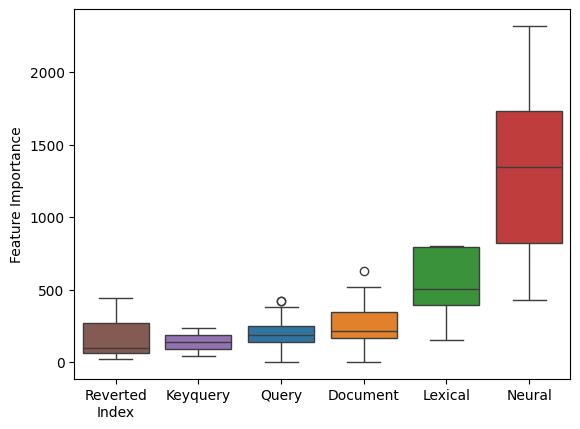

In [ ]:
order = df.groupby('feature_category')['importance'].median().sort_values().index

sns.boxplot(data=df, x='feature_category', y='importance', hue='feature_category', order=order)

plt.xlabel('')
plt.ylabel('Feature Importance')

plt.savefig('feature_importance_per_type.pdf')

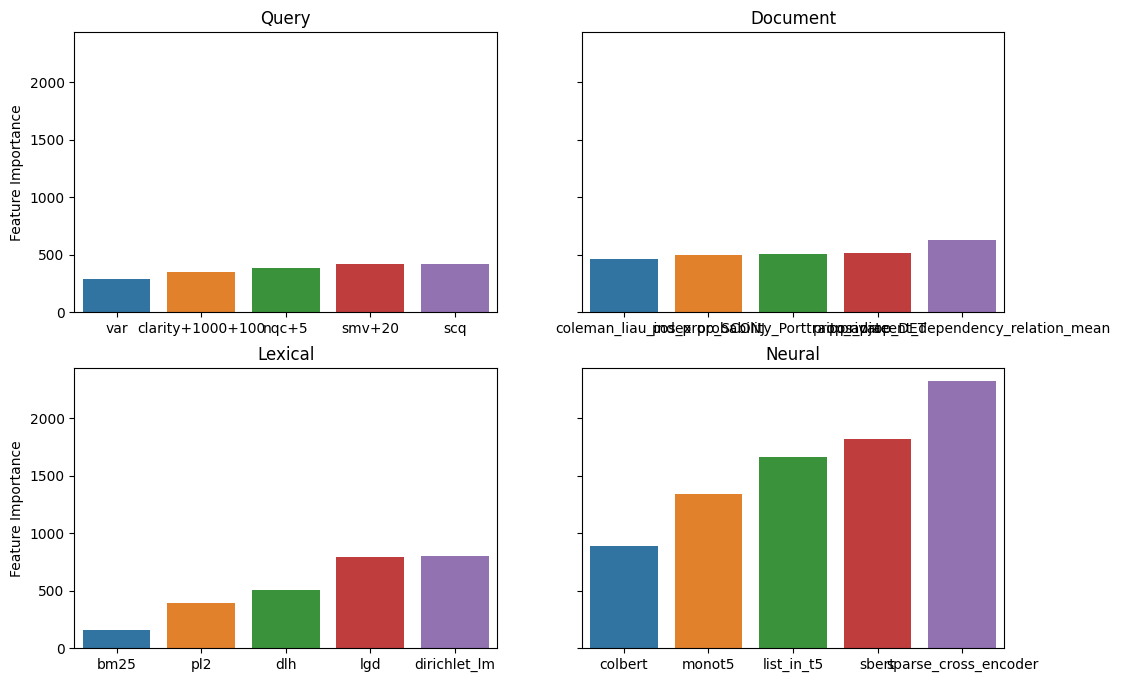

In [ ]:
df2 = df[df['feature_category'].isin(['Query', 'Document', 'Lexical', 'Neural'])].sort_values('importance', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

ax_mapping = dict(zip(['Query', 'Document', 'Lexical', 'Neural'], axes.flatten())) 

for category, sub_df in df2.groupby('feature_category').head(5).groupby('feature_category'):
    ax = ax_mapping[category]
    sns.barplot(data=sub_df.sort_values('importance'), x='feature_name', y='importance', ax=ax, hue='feature_name')

    ax.set_title(category)
    ax.set_xlabel('')
    ax.set_ylabel('Feature Importance')
    # ax.set_xticklabels(df['feature_name'], rotation=45)

ax[0, 0].set_xticks([''])

# sns.catplot(data=df, kind='box', x='feature_name', y='importance', col='feature_category')

In [6]:
df2.groupby('feature_category').head(5)

NameError: name 'df2' is not defined